In [1]:
import pandas as pd

file_path = 'data/processed_bert.csv'
data = pd.read_csv(file_path)

data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Columns: 770 entries, 0 to text
dtypes: float64(768), int64(1), object(1)
memory usage: 44.7+ MB


(None,
           0         1         2         3         4         5         6  \
 0 -0.822546 -0.472057 -0.579868  0.601334  0.001131 -0.033307  0.621883   
 1 -0.932106 -0.444832 -0.946184  0.783482  0.649199 -0.417868  0.810984   
 2 -0.786213 -0.454594 -0.989117  0.766382  0.825029 -0.260707  0.601579   
 3 -0.929848 -0.641187 -0.984187  0.838084  0.698074 -0.439465  0.848216   
 4 -0.782167 -0.475203 -0.785371  0.579609  0.718675 -0.169704  0.333027   
 
           7         8         9  ...       760       761       762       763  \
 0  0.219169 -0.297440 -0.999933  ...  0.746353  0.789280  0.454223  0.652186   
 1  0.553593 -0.841144 -0.999991  ...  0.972591  0.666550 -0.809021  0.077952   
 2  0.324533 -0.961853 -0.999995  ...  0.992954  0.505823 -0.130431 -0.429334   
 3  0.544355 -0.940431 -0.999996  ...  0.995336  0.807030 -0.736760 -0.092651   
 4  0.279532 -0.594330 -0.999871  ...  0.968012  0.792530  0.080506  0.567232   
 
         764       765       766       767  tar

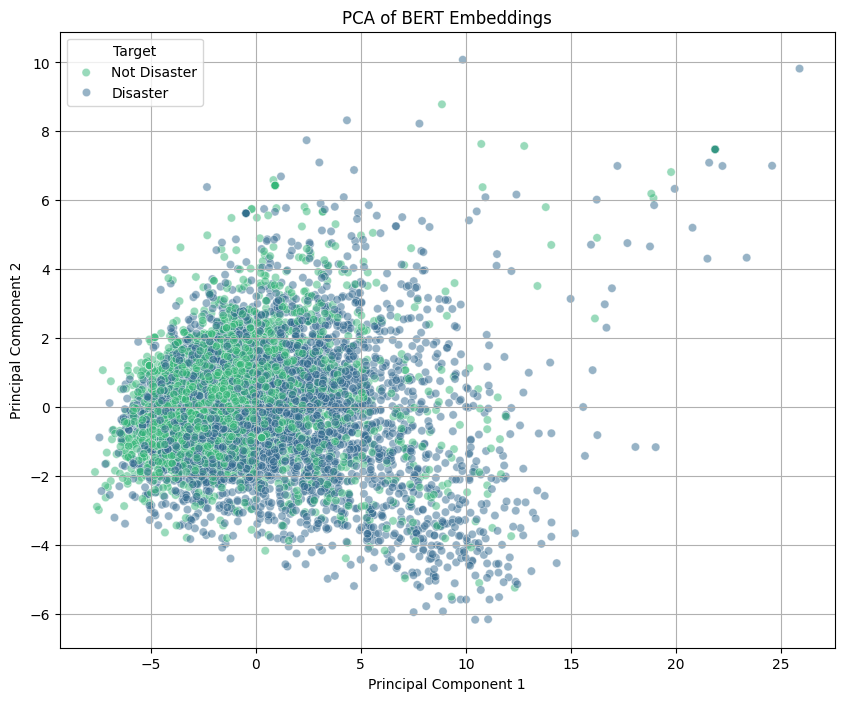

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = data.iloc[:, :-2] 
y = data['target']

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
pca_df['Target'] = y


plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=pca_df, palette='viridis', alpha=0.5)
plt.title('PCA of BERT Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', labels=['Not Disaster', 'Disaster'])
plt.grid(True)
plt.show()


Calculating PHATE...
  Running PHATE on 7613 observations and 768 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 5.55 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.99 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 8.56 seconds.
  Calculating landmark operator...
    Calculating SVD...


/Users/blakebarber/Library/Python/3.10/lib/python/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 209 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/Users/blakebarber/Library/Python/3.10/lib/python/site-packages/graphtools/graphs.py:454: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


    Calculated SVD in 0.63 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.33 seconds.
  Calculated landmark operator in 5.77 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 4.92 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.96 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 6.45 seconds.
Calculated PHATE in 27.67 seconds.


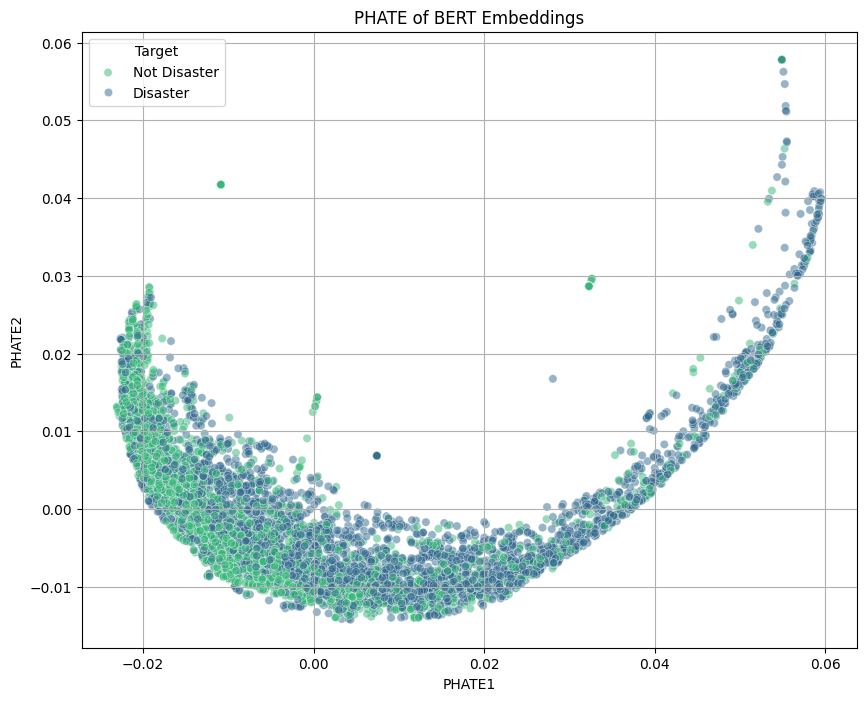

In [3]:
# try phate
import phate
import numpy as np

phate_op = phate.PHATE()
X_phate = phate_op.fit_transform(X)

phate_df = pd.DataFrame(data = X_phate, columns = ['PHATE1', 'PHATE2'])
phate_df['Target'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PHATE1', y='PHATE2', hue='Target', data=phate_df, palette='viridis', alpha=0.5)
plt.title('PHATE of BERT Embeddings')
plt.xlabel('PHATE1')
plt.ylabel('PHATE2')
plt.legend(title='Target', labels=['Not Disaster', 'Disaster'])
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


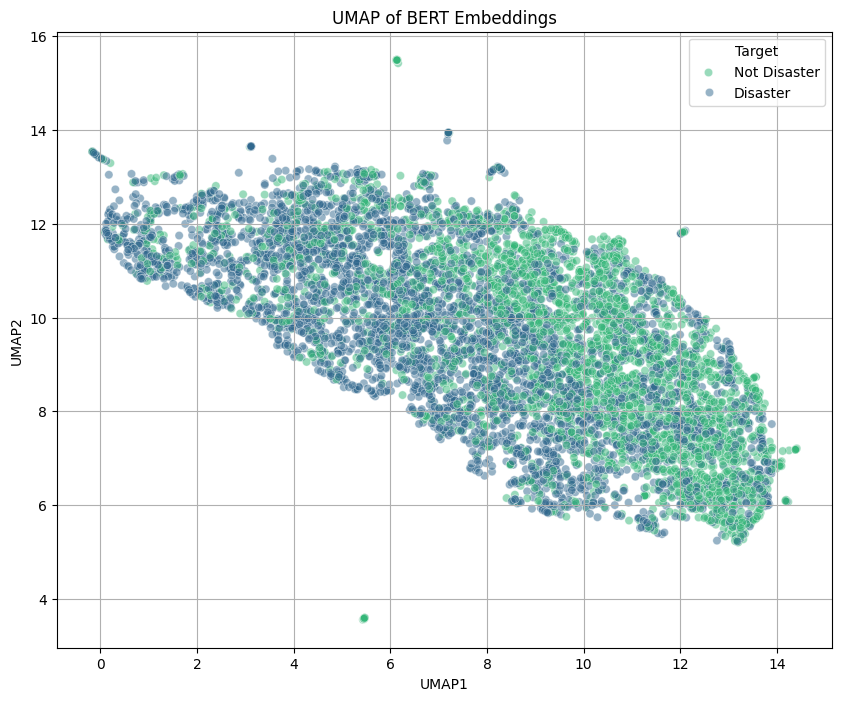

In [7]:
#  try UMAP
import umap.umap_ as umap

umap_op = umap.UMAP()
X_umap = umap_op.fit_transform(X)

umap_df = pd.DataFrame(data = X_umap, columns = ['UMAP1', 'UMAP2'])
umap_df['Target'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Target', data=umap_df, palette='viridis', alpha=0.5)
plt.title('UMAP of BERT Embeddings')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Target', labels=['Not Disaster', 'Disaster'])
plt.grid(True)
plt.show()

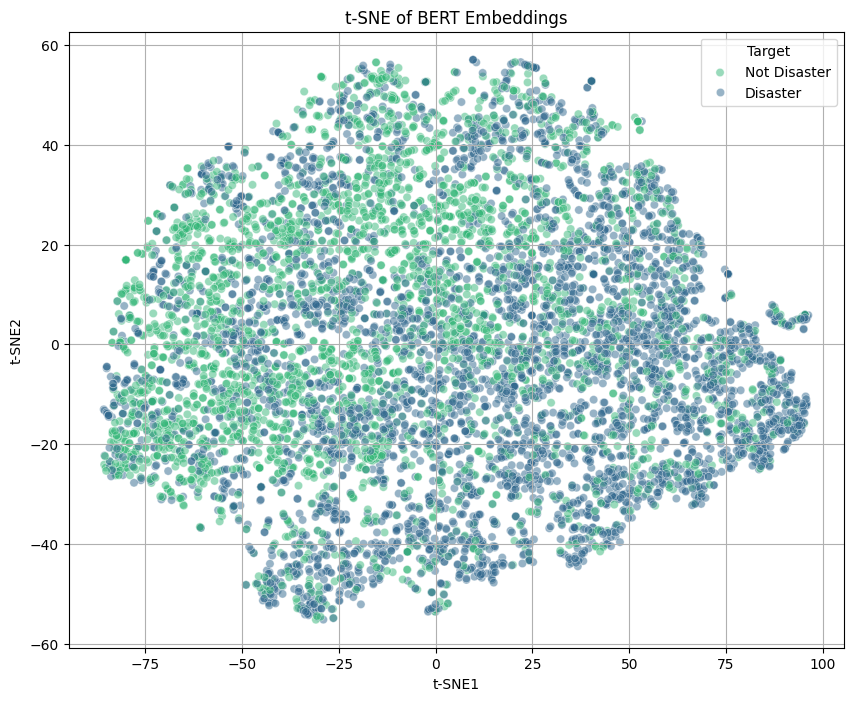

In [8]:
# try t-SNE
from sklearn.manifold import TSNE

tsne_op = TSNE(n_components=2)
X_tsne = tsne_op.fit_transform(X)

tsne_df = pd.DataFrame(data = X_tsne, columns = ['t-SNE1', 't-SNE2'])
tsne_df['Target'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Target', data=tsne_df, palette='viridis', alpha=0.5)
plt.title('t-SNE of BERT Embeddings')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(title='Target', labels=['Not Disaster', 'Disaster'])
plt.grid(True)
plt.show()